In [4]:
import numpy as np
import math as mt
from copy import deepcopy

def Balas(costo, rest, recurso, lim):
    print('- - - - - - - - - - - - - - - - - - - -')
    print('PROBLEMA INICIAL \n')
    Problema(costo, rest, recurso, lim)

    cantidad = IntToBin(lim)

    costo_n, rest_n = TransBin(costo, rest, cantidad)

    costo_n, rest_n, b_n, costo_add = PosCost(costo_n, rest_n, recurso)
    print('PROBLEMA MODIFICADO: Formato Balas \n')
    Problema_Balas(costo_n, rest_n, b_n)
    print('- - - - - - - - - - - - - - - - - - - -')
    print('')
    incumbente = sum(costo_n)+1
    conjunto_j_incumbente = []
    sonda_j_incumbente = []
    conjunto_j = []
    sonda_j = []
    conjunto_N = [i+1 for i in range(len(costo_n))]
    n=0
    while True:
        print('- - - - - - - - - - - - - - - - - - - -')
        print(f'Iteración {n}\n')
        backward = 0

        s, n_s = Cálculo_S(rest_n, b_n, conjunto_j)
        print('Variables de holgura (Si):', s)
        print('Restricciones infactibles', [n_s[i]+1 for i in range(len(n_s))])
        print('')

        if backward == 0:
            conjunto_N1, backward = Prueba1(s, n_s, rest_n, b_n, conjunto_N, conjunto_j)
            print('Prueba 1.')
            print('N1: ',conjunto_N1)
            print('Movimiento backward: ', backward)
            print('')

        if backward == 0:
            conjunto_N2, backward = Prueba2(costo_n, conjunto_j, conjunto_N1, incumbente)
            print('Prueba 2.')
            print('N2: ',conjunto_N2)
            print('Movimiento backward: ', backward)
            print('')

        if backward == 0:
            C_t, backward = Prueba3(s, n_s, rest_n, conjunto_N2)
            print('Prueba 3.')
            print('C: ',C_t)
            print('Movimiento backward: ', backward)
            print('')

        if backward == 0:
            backward = Prueba3_GZ(s, n_s, rest_n, costo_n, incumbente, conjunto_j, conjunto_N2)
            print('Prueba 3 de Glover-Zionts.')
            print('Movimiento backward: ', backward)
            print('')

        if backward == 0:
            add_j, add_sonda_j, continuar = PruebaA_G(s, n_s, rest_n, conjunto_N2)
            print('Prueba de ampliación de Geoffrion.')
            print('Adicionar a J:', add_j)
            print('Adicionar a sonda_J:', add_sonda_j)
            print('Continuar pruebas de ampliación:', continuar)
            print('')

            if continuar == 1:
                add_j, add_sonda_j, continuar = PruebaA_GZ(s, n_s, costo_n, rest_n, incumbente, conjunto_j, conjunto_N2)
                print('Prueba de ampliación de Glover-Zionts.')
                print('Adicionar a J:', add_j)
                print('Adicionar a sonda_J:', add_sonda_j)
                print('Continuar pruebas de ampliación:', continuar)
                print('')

                if continuar == 1:
                    add_j, add_sonda_j, backward = Prueba4(s, rest_n, costo_n, conjunto_N2)
                    print('Prueba 4.')
                    print('Adicionar a J:', add_j)
                    print('Adicionar a sonda_J:', add_sonda_j)
                    print('Movimiento backward:', backward)
                    print('')

        if backward == 0:
            conjunto_j, sonda_j = act_j(conjunto_j, sonda_j, add_j, add_sonda_j)
            

        if backward == 1:
            parar = 0
            add_j, add_sonda_j, parar = PruebaTuan(rest_n, b_n, costo_n, conjunto_j, sonda_j)
            print('Prueba de Tuan (Movimiento hacia atrás).')
            print('Variable a modificar:', add_j)
            print('Sonda:', add_sonda_j)
            print('Parar proceso:', parar)
            print('')
            if parar == 1:
                break
            conjunto_j, sonda_j = act_j_bw(conjunto_j, sonda_j, add_j, add_sonda_j)
        print(f'Resumen iteración {n}.')
        print('J:', conjunto_j)
        print('Sonda_J:', sonda_j)
        print('')
        incumbente, conjunto_j_incumbente, sonda_j_incumbente = act_incumbente(rest_n, b_n, costo_n, conjunto_j, sonda_j, incumbente, conjunto_j_incumbente, sonda_j_incumbente)
        print('Incumbente:', incumbente) 
        print('J incumbente:', conjunto_j_incumbente)
        print('')
        print(f'Fin {n}.')
        print('- - - - - - - - - - - - - - - - - - - -')
        print('')
        n += 1
    
    print(f'Resumen iteración {n}.')
    print('J:', conjunto_j)
    print('Sonda_J:', sonda_j)
    print('')
    incumbente, conjunto_j_incumbente, sonda_j_incumbente = act_incumbente(rest_n, b_n, costo_n, conjunto_j, sonda_j, incumbente, conjunto_j_incumbente, sonda_j_incumbente)
    print('')
    print('Incumbente:', incumbente) 
    print('J incumbente:', conjunto_j_incumbente)
    print('')
    print(f'Fin {n}')
    print('- - - - - - - - - - - - - - - - - - - -')
    print('')
    print('- - - - - - - - - - - - - - - - - - - -')   
    print('Solución problema binario\n')    
    print(f'Incumbente: {incumbente}')
    print(f'Conjunto j: {conjunto_j_incumbente}')
    print(f'Sonda j:    {sonda_j_incumbente}')
    print('- - - - - - - - - - - - - - - - - - - -')
    print('')
    print('- - - - - - - - - - - - - - - - - - - -')
    print('Solución problema inicial\n')
    f0, x_int = BinToInt(costo, cantidad, conjunto_j_incumbente)
    print('El valor de la función objetivo es: ', f0)
    print('El valor de las variables es:')
    for i in range(len(costo)):
        print(f'x{i+1} = {x_int[i]}')
    print('- - - - - - - - - - - - - - - - - - - -')

In [5]:
def abslist(l):
    ln = list()
    for i in range(len(l)):
        ln.append(abs(l[i]))
    return ln

def IntToBin(limites):
    cantidad_variables = list()
    for i in lim:
        cantidad_variables.append(mt.ceil(mt.log2(i+1)-1)+1)
    return cantidad_variables

def TransBin(cost, rest, cantidad_variables):
    costo_n = list()
    rest_n = list()
    for i in range(len(cost)):
        for j in range(cantidad_variables[i]):
            costo_n.append(cost[i]*mt.pow(2,j))
    for i in range(len(rest)):
        rest_i = list()
        for j in range(len(rest[0])):
            for k in range(cantidad_variables[j]):
                rest_i.append(rest[i][j]*mt.pow(2,k))
        rest_n.append(rest_i)
    return costo_n, rest_n

def PosCost(costo_n, rest_n, b):
    cambio_costo = np.zeros(len(costo_n))
    b_n = list()
    for i in range(len(rest_n)):
        b_c = 0
        for j in range(len(rest_n[0])):
            if costo_n[j]<0:
                cambio_costo[j]=-1
                b_c += rest_n[i][j]
                rest_n[i][j] *= -1
            else:
                cambio_costo[j]=1
        b_n.append(b[i]-b_c)
    
    costo_add = 0
    for i in range(len(costo_n)):
        if costo_n[i]<0:
            costo_add += costo_n[i]
            costo_n[i] *= -1
    return costo_n, rest_n, b_n, costo_add

def Problema(c, A, b, lim):
    text = 'min v = '
    for i in range(len(c)):
        if c[i]<0:
            text = text+ '- '+str(abs(c[i]))+'*x'+str(i+1)+ ' '
        else:
            text = text+ '+ '+str(abs(c[i]))+'*x'+str(i+1)+ ' '
    print(text)
    print('s.a:')
    for i in range(len(A)):
        text = ''
        for j in range(len(A[0])):
            if A[i][j]<0:
                text = text + '- '+str(abs(A[i][j]))+'*x'+str(j+1)+' '
            else:
                text = text + '+ '+str(abs(A[i][j]))+'*x'+str(j+1)+' '
        text += '<= '+str(b[i])
        print(text)
    for i in range(len(c)):
        text = '0 <= x'+str(i+1)+' <= '+str(lim[i]) 
        print(text)
    print('xi Enteros\n')

def Problema_Balas(c,A,b):
    text = 'min v = '
    for i in range(len(c)):
        if c[i]<0:
            text = text+ '- '+str(abs(c[i]))+'*x'+str(i+1)+ ' '
        else:
            text = text+ '+ '+str(abs(c[i]))+'*x'+str(i+1)+ ' '
    print(text)
    print('s.a:')
    for i in range(len(A)):
        text = ''
        for j in range(len(A[0])):
            if A[i][j]<0:
                text = text + '- '+str(abs(A[i][j]))+'*x'+str(j+1)+' '
            else:
                text = text + '+ '+str(abs(A[i][j]))+'*x'+str(j+1)+' '
        text += '<= '+str(b[i])
        print(text)
    print('xi Є {0, 1}')
    
def Zeta0(c, conjunto_j):
    z0 = 0
    for i in conjunto_j:
        if i>0:
            z0 += c[i-1]
    return z0

def Cálculo_S(A, b, conjunto_j):
    s = list()
    
    for i in range(len(A)):
        resta = 0
        for j in conjunto_j:
            if j > 0:
                resta += A[i][j-1]
        s.append(b[i]-resta)
    
    n_s = list()
    for i in range(len(s)):
        if s[i]<0:
            n_s.append(i)
    return s, n_s

def ConjuntoJP(conjunto_j, sonda_j):
    conjunto_jp = list()
    for i in range(len(sonda_j)):
        if (sonda_j[i] == 0)&(conjunto_j[i]>0):
            conjunto_jp.append(conjunto_j[i])
    return conjunto_jp

def Prueba1(s, n_s, A, b, conjunto_N, conjunto_j):
    libres = set(conjunto_N).difference(set(abslist(conjunto_j)))
    
    A_t = list()       
    for j in libres:
        Apos = 0
        for i in n_s:
            if A[i][j-1] >= 0:
                Apos += 1
        if Apos == len(n_s):
            A_t.append(j)
    
    conjunto_N1 = list(libres.difference(set(A_t)))
    if len(conjunto_N1)==0:
        backward = 1
    else:
        backward = 0
    
    return conjunto_N1, backward
    
def Prueba2(c, conjunto_j, conjunto_N1, incumbente):
    z0 = Zeta0(c, conjunto_j)
    B_t = list()
    for i in conjunto_j:
        if z0 + c[i-1] >= incumbente:
            B_t.append(i)
    
    conjunto_N2 = list(set(conjunto_N1).difference(set(B_t)))
    
    if len(conjunto_N2) == 0:
        backward = 1
    else:
        backward = 0
    return conjunto_N2, backward

def Prueba3(s, n_s, A, conjunto_N2):
    A_neg = deepcopy(A)
    for i in range(len(A_neg)):
        for j in range(len(A_neg[0])):
            if A_neg[i][j] >= 0:
                A_neg[i][j] = 0
    
    s_p3, _ = Cálculo_S(A_neg, s, conjunto_N2)
    
    C_t = []
    for i in range(len(s_p3)):
        if (s_p3[i]<0)&(s_p3[i] in n_s):
            C_t.append(i+1)
            
    if len(C_t) != 0:
        backward = 1
    else:
        backward = 0
        
    return C_t, backward

def Prueba3_GZ(s, n_s, A, c, incumbente, conjunto_j, conjunto_N2):
    z0 = Zeta0(c, conjunto_j)
    r = list()
    for i in n_s:
        for j in conjunto_N2:
            if A[i][j-1] < 0:
                r.append(s[i]*c[j-1]/A[i][j-1])
                
    if z0+np.min(r) < incumbente:
        backward = 0
    else:
        backward = 1
    return backward

def PruebaA_G(s, n_s, A, conjunto_N2):
    for i in n_s:
        s_ti = s[i]

        for j in conjunto_N2:
            s_ti -= np.min([0,A[i][j-1]])
        
        add_j = list()
        for j in conjunto_N2:
            if s_ti - abs(A[i][j-1])<0:
                if A[i][j-1] > 0:
                    add_j.append(-j)
                else:
                    add_j.append(j)
                    
    if len(add_j)==0:
        continuar = 1
    else:
        continuar = 0
        add_j = [add_j[0]]
    
    add_sonda_j = [1 for i in range(len(add_j))]
    return add_j, add_sonda_j, continuar

def PruebaA_GZ(s, n_s, c, A, incumbente, conjunto_j, conjunto_N2):
    z0 = Zeta0(c, conjunto_j)
    for i in n_s:
        pro = list()
        p = list()
        for j in conjunto_N2:
            if A[i][j-1]<=s[i]:
                pro.append(j)
            else:
                p.append(j)
        try:
            ch = np.min([c[j-1] for j in pro])
        except:
            ch = 0
        add_j = list()
        for j in p:
            if ch + c[j-1] >= incumbente - z0:
                add_j.append(-j)
                
    if len(add_j)==0:
        continuar = 1
    else:
        continuar = 0
    
    add_sonda_j = [0 for i in range(len(add_j))]
    return add_j, add_sonda_j, continuar

def Prueba4(s, A, costo_n, conjunto_N2):
    v = list()
    for j in conjunto_N2:
        v_i = 0
        for i in range(len(s)):
            v_i += np.min([0, s[i]-A[i][j-1]])
        v.append(v_i)
        
    vmax = list(np.where(v == np.max(v))[0])
    
    if len(vmax) > 1:
        costo_vmax = [costo_n[conjunto_N2[vmax[i]]-1] for i in range(len(vmax))]
        costo_min = np.where(costo_vmax == np.min(costo_vmax))[0]
    else:
        costo_min = vmax[0]
    
    k = conjunto_N2[int(costo_min)]
    add_j = [k]
    add_sonda_j = [0]
    backward = 0
    return add_j, add_sonda_j, backward

def PruebaTuan(A, b, c, conjunto_j, sonda_j):
    positiva = False
    for j in range(len(conjunto_j)):
        if (conjunto_j[j] > 0)&(sonda_j[j]==0):
            positiva = True
    
    if (sum(sonda_j)==len(sonda_j)) or (positiva==False):
        add_j = []
        add_sonda_j = []
        parar = 1
    else:   
        conjunto_jp = ConjuntoJP(conjunto_j, sonda_j)
        s, n_s = Cálculo_S(A, b, conjunto_j)

        w = list()
        for j in conjunto_jp:
            w_i = 0
            for i in range(len(s)):
                w_i += np.min([0, s[i]+A[i][j-1]]) 
            w.append(w_i)
        wmax = list(np.where(w == np.min(w))[0]) #MODIFICACIÓN############################################
        
        if len(wmax) > 1:
            costo_wmax = [c[conjunto_jp[wmax[i]]-1] for i in range(len(wmax))]
            costo_max = list(np.where(costo_wmax == np.max(costo_wmax))[0])[0]
        else:
            costo_max = wmax[0]

        k = conjunto_jp[int(costo_max)]
        add_j = [-k]
        add_sonda_j = [1]
        parar = 0
    return add_j, add_sonda_j, parar
            
def act_j(conjunto_j, sonda_j, add_j, add_sonda_j):
    for i in range(len(add_j)):
        conjunto_j.append(add_j[i])
        sonda_j.append(add_sonda_j[i])
    return conjunto_j, sonda_j

def act_j_bw(conjunto_j, sonda_j, add_j, add_sonda_j):
    variable = abs(add_j[0])
    indice = np.where(np.array(conjunto_j) == variable)[0]
    conjunto_j[indice[0]] *= -1
    sonda_j[indice[0]] = 1
    return conjunto_j, sonda_j
    
def act_incumbente(A, b, c, conjunto_j, sonda_j, incumbente, conjunto_j_incumbente, sonda_j_incumbente):
    z0 = Zeta0(c, conjunto_j)
    s, n_s = Cálculo_S(A, b, conjunto_j)
    if (z0 < incumbente)&(len(n_s)==0):
        incumbente=z0
        conjunto_j_incumbente = deepcopy(conjunto_j)
        sonda_j_incumbente = deepcopy(sonda_j)
    return incumbente, conjunto_j_incumbente, sonda_j_incumbente
          
def BinToInt(costo, cantidad, conjunto_j):
    cambio_valor = list()
    for i in range(len(costo)):
        for j in range(cantidad[i]):
            if costo[i]>=0:
                cambio_valor.append(0)
            else:
                cambio_valor.append(1)
                
    variables = list()
    for i in range(len(cantidad)):
        if i == 0:
            variables.append(cantidad[i])
        else:
            variables.append(variables[i-1]+cantidad[i])
    variables.insert(0,0)
    x_bin = list(np.zeros(variables[-1]))
    for j in conjunto_j:
        if j > 0:
            x_bin[j-1] = 1
    for i in range(len(cambio_valor)):
        if cambio_valor[i]==1:
            x_bin[i] = 1-x_bin[i]
    x_int = list(np.zeros(len(costo)))
    for i in range(len(costo)):
        x_i = x_bin[variables[i]:variables[i+1]];
        for j in range(len(x_i)):
            x_int[i] += x_i[j]*mt.pow(2,j)
    f0 = 0
    for i in range(len(costo)):
        f0 += x_int[i]*costo[i]
    
    return f0, x_int        


# Ejercicio 1
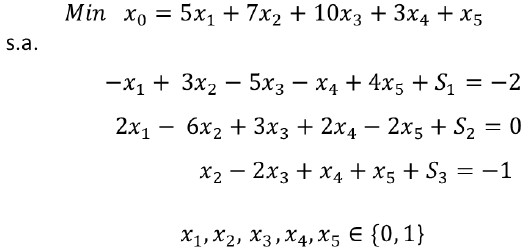

In [6]:
costo = [-5, 7, 10, -3, 1]
rest = [[ 1,  3, -5,  1,  4], 
        [-2, -6,  3, -2, -2], 
        [ 0,  1, -2, -1,  1]]
recurso = [0, -4, -2]
lim = [1, 1, 1, 1, 1]

Balas(costo, rest, recurso, lim);

- - - - - - - - - - - - - - - - - - - -
PROBLEMA INICIAL 

min v = - 5*x1 + 7*x2 + 10*x3 - 3*x4 + 1*x5 
s.a:
+ 1*x1 + 3*x2 - 5*x3 + 1*x4 + 4*x5 <= 0
- 2*x1 - 6*x2 + 3*x3 - 2*x4 - 2*x5 <= -4
+ 0*x1 + 1*x2 - 2*x3 - 1*x4 + 1*x5 <= -2
0 <= x1 <= 1
0 <= x2 <= 1
0 <= x3 <= 1
0 <= x4 <= 1
0 <= x5 <= 1
xi Enteros

PROBLEMA MODIFICADO: Formato Balas 

min v = + 5.0*x1 + 7.0*x2 + 10.0*x3 + 3.0*x4 + 1.0*x5 
s.a:
- 1.0*x1 + 3.0*x2 - 5.0*x3 - 1.0*x4 + 4.0*x5 <= -2.0
+ 2.0*x1 - 6.0*x2 + 3.0*x3 + 2.0*x4 - 2.0*x5 <= 0.0
+ 0.0*x1 + 1.0*x2 - 2.0*x3 + 1.0*x4 + 1.0*x5 <= -1.0
xi Є {0, 1}
- - - - - - - - - - - - - - - - - - - -

- - - - - - - - - - - - - - - - - - - -
Iteración 0

Variables de holgura (Si): [-2.0, 0.0, -1.0]
Restricciones infactibles [1, 3]

Prueba 1.
N1:  [1, 3, 4]
Movimiento backward:  0

Prueba 2.
N2:  [1, 3, 4]
Movimiento backward:  0

Prueba 3.
C:  []
Movimiento backward:  0

Prueba 3 de Glover-Zionts.
Movimiento backward:  0

Prueba de ampliación de Geoffrion.
Adicionar a J: [3]
Adic

# Ejercicio 2
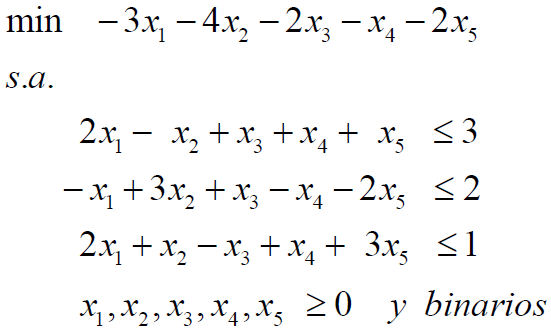

In [7]:
costo = [-3, -4, -2, -1, -2]
rest = [[2, -1, 1, 1, 1], 
        [-1, 3, 1, -1, -2], 
        [2, 1, -1, 1, 3]]
recurso = [3, 2, 1]
lim = [1, 1, 1, 1, 1] 

Balas(costo, rest, recurso, lim);

- - - - - - - - - - - - - - - - - - - -
PROBLEMA INICIAL 

min v = - 3*x1 - 4*x2 - 2*x3 - 1*x4 - 2*x5 
s.a:
+ 2*x1 - 1*x2 + 1*x3 + 1*x4 + 1*x5 <= 3
- 1*x1 + 3*x2 + 1*x3 - 1*x4 - 2*x5 <= 2
+ 2*x1 + 1*x2 - 1*x3 + 1*x4 + 3*x5 <= 1
0 <= x1 <= 1
0 <= x2 <= 1
0 <= x3 <= 1
0 <= x4 <= 1
0 <= x5 <= 1
xi Enteros

PROBLEMA MODIFICADO: Formato Balas 

min v = + 3.0*x1 + 4.0*x2 + 2.0*x3 + 1.0*x4 + 2.0*x5 
s.a:
- 2.0*x1 + 1.0*x2 - 1.0*x3 - 1.0*x4 - 1.0*x5 <= -1.0
+ 1.0*x1 - 3.0*x2 - 1.0*x3 + 1.0*x4 + 2.0*x5 <= 2.0
- 2.0*x1 - 1.0*x2 + 1.0*x3 - 1.0*x4 - 3.0*x5 <= -5.0
xi Є {0, 1}
- - - - - - - - - - - - - - - - - - - -

- - - - - - - - - - - - - - - - - - - -
Iteración 0

Variables de holgura (Si): [-1.0, 2.0, -5.0]
Restricciones infactibles [1, 3]

Prueba 1.
N1:  [1, 2, 3, 4, 5]
Movimiento backward:  0

Prueba 2.
N2:  [1, 2, 3, 4, 5]
Movimiento backward:  0

Prueba 3.
C:  []
Movimiento backward:  0

Prueba 3 de Glover-Zionts.
Movimiento backward:  0

Prueba de ampliación de Geoffrion.
Adicionar a J: 